In [20]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import StandardScaler
import sklearn as skl
from sklearn.decomposition import PCA
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Read in DF and clean column
myopia_db = pd.read_csv('Resources/myopia.csv')
myopia_db = myopia_db.drop('MYOPIC', axis=1)
myopia_db.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [3]:
# Normalise the data
myopia_scaled = StandardScaler().fit_transform(myopia_db)
print(myopia_scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


In [4]:
# Applying PCA to reduce dimensions from 4 to 2

# Initialise PCA model
pca = PCA(n_components=0.99)

# Get two principal components for the iris data.
myopia_pca = pca.fit_transform(myopia_scaled)

In [9]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=myopia_pca, columns=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
)
df_myopia_pca.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,-1.389112,-0.574909
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-0.118153,0.527492
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,-0.287739,0.128478
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,0.652956,-0.672679
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,0.007640,0.995370


In [10]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566,
       0.04286506, 0.03839767])

In [12]:
# Initialise t-SNE model
tsne = TSNE(learning_rate=35)

In [13]:
tsne_features = tsne.fit_transform(df_myopia_pca)

c:\Users\mkste\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [14]:
tsne_features.shape

(618, 2)

In [15]:
# Prepare to plot the dataset

# The first column of transformed features
df_myopia_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_myopia_pca['y'] = tsne_features[:,1]

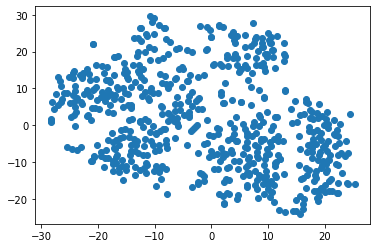

In [19]:
# Visualise the clusters
plt.scatter(df_myopia_pca['x'], df_myopia_pca['y'])
plt.show()

In [21]:
# Initialising model with K = 5 
model = KMeans(n_clusters=5, random_state=5)

In [22]:
# Fitting model
model.fit(df_myopia_pca)

KMeans(n_clusters=5, random_state=5)

In [23]:
# Get predictions
predictions = model.predict(df_myopia_pca)
print(predictions)

[2 2 1 3 0 0 3 3 1 0 4 2 3 1 0 1 1 0 4 1 3 3 3 0 1 3 2 0 2 0 0 4 2 0 0 1 4
 1 3 3 2 1 4 4 0 1 4 1 0 4 2 3 3 0 3 3 2 4 1 3 1 0 1 1 4 0 1 1 1 3 2 4 4 1
 1 0 3 4 3 3 2 3 0 0 3 2 0 4 0 2 1 3 2 1 3 4 3 2 0 1 4 3 1 3 0 1 3 1 2 3 4
 3 4 4 2 2 1 3 2 3 2 3 2 1 4 0 3 0 2 0 0 3 0 1 2 3 1 0 3 1 0 1 2 1 2 4 3 4
 0 4 0 3 4 4 3 3 0 2 4 0 3 3 4 1 0 4 4 0 0 3 2 2 4 3 0 1 4 2 0 4 1 4 3 0 1
 4 0 2 3 2 2 0 2 1 2 1 3 1 2 0 0 0 1 3 1 2 0 3 2 2 4 0 2 2 0 0 4 3 1 4 2 3
 2 3 3 0 4 4 0 1 4 0 0 4 0 2 2 0 1 1 4 0 3 3 0 3 0 0 4 3 0 4 2 4 0 0 0 0 4
 3 4 3 0 4 2 1 2 2 3 3 1 1 1 4 3 0 3 0 4 2 4 4 2 4 2 0 1 0 3 1 1 3 0 3 4 3
 3 3 1 3 3 0 2 4 0 2 4 3 3 4 0 2 3 2 2 2 0 1 2 4 1 2 2 1 2 3 1 2 1 1 3 2 3
 2 2 3 2 0 3 3 0 1 3 0 0 0 0 4 4 1 3 3 2 3 1 1 2 1 0 1 2 2 3 3 3 2 3 1 1 3
 0 1 1 2 4 2 1 3 2 1 0 2 1 0 2 4 3 4 0 4 0 4 1 2 2 0 1 2 1 1 1 3 0 4 4 0 0
 4 1 1 0 0 2 1 3 0 2 1 1 3 2 4 3 0 4 2 1 0 0 1 4 0 3 3 2 4 0 4 2 4 0 2 3 4
 2 3 1 0 3 4 4 4 2 4 0 4 1 3 2 4 2 3 3 2 4 1 2 4 3 0 0 2 1 0 4 0 0 1 3 4 0
 0 2 4 1 2 0 4 2 4 4 3 3 

c:\Users\mkste\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


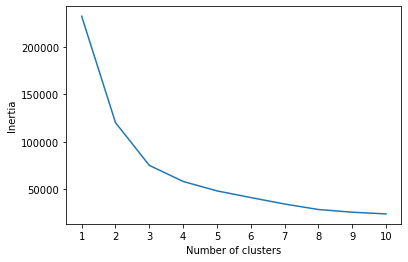

In [24]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Findings 

- I do not believe the patients can be clustered with any certainty - it looks like there are five serpare clusters but they are varied and have slight overlap and no great seperation.
- There may be more data that we could overlay to add to the model to further define the clusters.